In [ ]:
pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 40kB/s 


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Instructions for updating:
non-resource variables are not supported in the long term
Num GPUs Available:  1


In [ ]:
from tensorflow.python.client import device_lib

In [ ]:
#print(device_lib.list_local_devices())


In [ ]:
#sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True))

In [ ]:
!pip install --upgrade pip
!pip install pandas as pd
!pip install numpy as np
!pip install keras

import tensorflow.compat.v1  as tf
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import keras



     |████████████████████████████████| 1.5MB 23.2MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
  Created wheel for pd: filename=pd-0.0.1-py3-none-any.whl size=6504 sha256=e807c13c42ae6b4100328f29b19a805386d80b3875d8817f8950b3ed3a9409ff
  Stored in directory: /root/.cache/pip/wheels/c0/45/39/f9063988f991ef39fdbe4e5f2c0e9085e3e0ab0465602e33da
Successfully built pd
  Created wheel for np: filename=np-1.0.2-py3-none-any.whl size=13652 sha256=912dbcf51f709a5b931b5d23a369488dd30ac0645b677cca668e86511fa3b375
  Stored in directory: /root/.cache/pip/wheels/8d/31/5b/f3f27c678f2b3ad7e29903ed09bb7446717fd4c8b35f53973a
Successfully built np


In [ ]:
!pip install imblearn
!pip install seaborn

In [ ]:
#gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.3333)]
NUM_THREADS=6

config = tf.ConfigProto(device_count = {'GPU': 65 , 'CPU': 35} ) #intra_op_parallelism_threads=NUM_THREADS)# 
sess = tf.Session(config=config) 
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 
tf.compat.v1.keras.backend.set_session(sess)

In [ ]:
!rm -rf ./logs/

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
train_data = pd.read_csv('/content/drive/MyDrive/REDES NEURAIS/datasets/train_values.csv')


In [ ]:
train_labels = pd.read_csv('/content/drive/MyDrive/REDES NEURAIS/datasets/train_labels.csv')


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/REDES NEURAIS/datasets/test_values.csv')

In [ ]:
test_labels = pd.read_csv('/content/drive/MyDrive/REDES NEURAIS/datasets/submission_format.csv')

In [161]:
test_labels

,building_id,damage_grade
0,300051,1
1,99355,1
2,890251,1
3,745817,1
4,421793,1
...,...,...
86863,310028,1
86864,663567,1
86865,1049160,1
86866,442785,1


In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

aux_train=pd.concat([train_data,train_labels["damage_grade"]], axis=1)
aux_test=pd.concat([test_data,test_labels["damage_grade"]], axis=1)

#aux.corr()

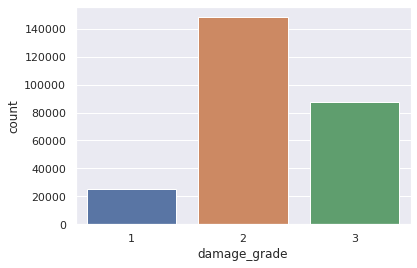

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="damage_grade", data=(aux_train))

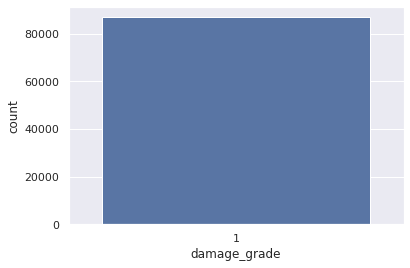

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="damage_grade", data=(aux_test))

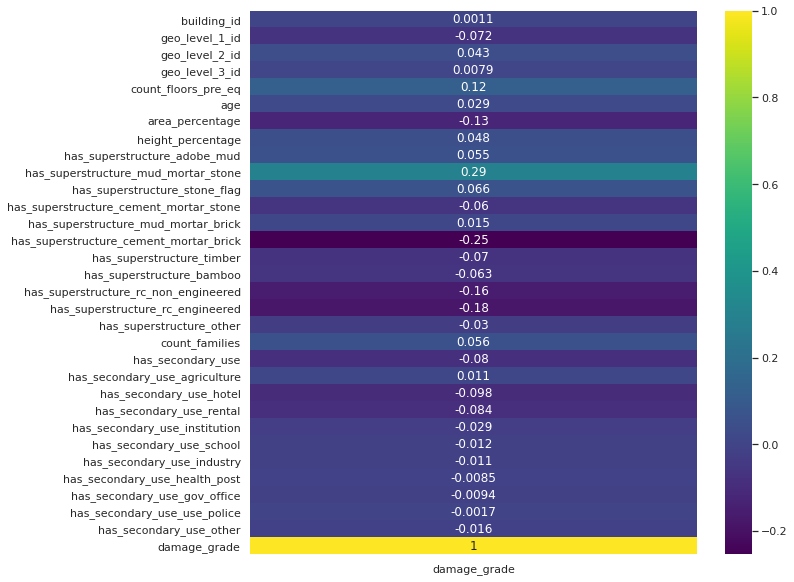

In [ ]:
plt.figure(figsize=(10,10))
cor=aux_train.corr()["damage_grade"]
cor=pd.DataFrame(cor)
sns.heatmap(cor,annot=True,cmap="viridis")

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


nr = NearMiss() #Undersampling
smt = SMOTE() #Oversampling

In [ ]:
dataset_train=aux_train#[features_selecionadas]

In [ ]:
dataset_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
dataset_train = pd.get_dummies(dataset_train)
dataset_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
260597,669485,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
260598,602512,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
260599,151409,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
datasheet_train=dataset_train.values

In [ ]:
dataset_test=aux_test
dataset_test= pd.get_dummies(dataset_test)
dataset_test

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,300051,17,596,11307,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,99355,6,141,11987,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,890251,22,19,10044,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,745817,26,39,633,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,421793,17,289,7970,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
86864,663567,10,1407,11907,3,25,6,7,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
86865,1049160,22,1136,7712,1,50,3,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
86866,442785,6,1041,912,2,5,9,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
datasheet_test=dataset_test.values

In [ ]:
pip install sklearn

In [ ]:
import random
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.metrics import confusion_matrix

##np.random.shuffle(datasheet_train)
##np.random.shuffle(datasheet_val)



In [ ]:
datasheet_train

array([[802906,      6,    487, ...,      0,      1,      0],
       [ 28830,      8,    900, ...,      0,      1,      0],
       [ 94947,     21,    363, ...,      0,      1,      0],
       ...,
       [602512,     17,     51, ...,      0,      1,      0],
       [151409,     26,     39, ...,      0,      1,      0],
       [747594,     21,      9, ...,      0,      1,      0]])

In [ ]:
datasheet_test

array([[ 300051,      17,     596, ...,       0,       1,       0],
       [  99355,       6,     141, ...,       0,       1,       0],
       [ 890251,      22,      19, ...,       0,       1,       0],
       ...,
       [1049160,      22,    1136, ...,       0,       1,       0],
       [ 442785,       6,    1041, ...,       0,       0,       0],
       [ 501372,      26,      36, ...,       0,       1,       0]])

In [ ]:
valores_linhas_train=datasheet_train[:,:]
valores_coluna_saida_train=train_labels.values
valores_coluna_saida_train=valores_coluna_saida_train[:,-1:]

In [ ]:
valores_linhas_test=datasheet_test[:,:]
valores_coluna_saida_test=test_labels.values
valores_coluna_saida_test=valores_coluna_saida_test[:,-1:]

In [ ]:
valores_linhas_train.shape

(260601, 70)

In [ ]:
valores_coluna_saida_train.shape

(260601, 1)

In [ ]:
valores_linhas_test.shape



(86868, 70)

In [ ]:
valores_coluna_saida_test.shape

(86868, 1)

In [ ]:
valores_coluna_saida_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])


#Balanceamento do dataset de treino por meio do underfitting

In [ ]:
valores_linhas_train, valores_coluna_saida_train = nr.fit_sample(valores_linhas_train, valores_coluna_saida_train)
#valores_linhas_test, valores_coluna_saida_test = nr.fit_sample(valores_linhas_test, valores_coluna_saida_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F

#Separação dos dados para validação dos modelos


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(valores_linhas_train, valores_coluna_saida_train, test_size=0.2, shuffle=True) # test_size é o percentual do dataset que vai ser usado nas amostras



In [ ]:
X_test, Y_test=valores_linhas_test,valores_coluna_saida_test

# Reshape do Y_teste (tanto Y_train e Y_val tem um shape no formato (n,))


In [ ]:
Y_test=np.reshape(Y_test,(Y_test.shape[0],))

#Normalização dos dados com pase nos pesos dos dados de treino

In [ ]:
import sklearn as sk
from sklearn import preprocessing
from joblib import dump

min_max_escalar=preprocessing.StandardScaler()  # MinMaxScaler()
#X_test=min_max_escalar.fit_transform(X_test)
X_train=min_max_escalar.fit_transform(X_train)

In [ ]:
dump(min_max_escalar, '/content/drive/MyDrive/REDES NEURAIS/TRABALHO FINAL - AM/scaler_filename.joblib')


['/content/drive/MyDrive/REDES NEURAIS/TRABALHO FINAL - AM/scaler_filename.joblib']

In [ ]:
from joblib import load
scaler = load('/content/drive/MyDrive/REDES NEURAIS/TRABALHO FINAL - AM/scaler_filename.joblib')


In [ ]:
##Normaliza os dados de teste com os parâmetros de normalização dos dados de treino
###X_test=scaler.fit_transform(X_test)

##Normaliza os dados de teste com os parâmetros de normalização dos dados de treino
X_val=scaler.fit_transform(X_val)
X_test=scaler.fit_transform(X_test)


#Seleção das variáveis por meio do PCA. Para uma variância de 85 %


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.85)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_val = pca.transform(X_val)

#Comparação entre os modelos para selecionar o melhor na classificação dos dados


In [ ]:
#importing standard neural network libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score # for evaluation
from sklearn.metrics import confusion_matrix,classification_report

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=5, random_state=10),
    KNeighborsClassifier(4),
    SVC(kernel = 'poly', C = 2),
     LogisticRegression(solver = 'lbfgs'),
    MLPClassifier(random_state=1, max_iter=100)    
]


In [ ]:

names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, Y_train)
    ypred = clf.predict(X_val)
    names.append(clf.__class__.__name__)
    print(clf.__class__.__name__)
    print(classification_report(ypred,Y_val))
    acc=accuracy_score(ypred, Y_val)
    scores.append(acc)
    print(acc)


DecisionTreeClassifier
              precision    recall  f1-score   support

           1       0.83      0.82      0.83      4965
           2       0.73      0.72      0.73      5177
           3       0.82      0.85      0.84      4933

    accuracy                           0.80     15075
   macro avg       0.80      0.80      0.80     15075
weighted avg       0.80      0.80      0.80     15075

0.7962852404643449
RandomForestClassifier
              precision    recall  f1-score   support

           1       0.79      0.73      0.76      5245
           2       0.45      0.58      0.51      3994
           3       0.78      0.68      0.73      5836

    accuracy                           0.67     15075
   macro avg       0.67      0.66      0.67     15075
weighted avg       0.70      0.67      0.68     15075

0.6719734660033168
KNeighborsClassifier
              precision    recall  f1-score   support

           1       0.88      0.77      0.82      5585
           2       0.63 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
              precision    recall  f1-score   support

           1       0.75      0.78      0.77      4708
           2       0.63      0.63      0.63      5087
           3       0.85      0.81      0.83      5280

    accuracy                           0.74     15075
   macro avg       0.74      0.74      0.74     15075
weighted avg       0.74      0.74      0.74     15075

0.743150912106136
MLPClassifier
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      4909
           2       0.98      0.98      0.98      5074
           3       0.99      0.99      0.99      5092

    accuracy                           0.99     15075
   macro avg       0.99      0.99      0.99     15075
weighted avg       0.99      0.99      0.99     15075

0.985273631840796


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


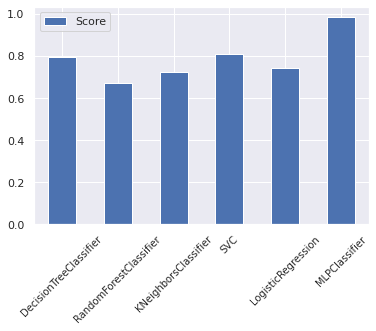

In [ ]:

score_df = pd.DataFrame({'Model': names,'Score': scores})
score_df.to_csv("score_df.csv")
ax = score_df.plot.bar()
ax.set_xticklabels(score_df['Model'], rotation=45, fontsize=10)
plt.savefig('/content/drive/MyDrive/REDES NEURAIS/TRABALHO FINAL - AM/comparacao_entre_os_modelos_scores.png')

# Uso do K-Fold para traino e teste do melhor modelo de classificação


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D,Conv2D, MaxPooling1D, MaxPooling2D,Flatten
from keras.optimizers import RMSprop

In [ ]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
scores=[]
# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((Y_train, Y_test), axis=0)

In [ ]:
#importing standard neural network libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score # for evaluation
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import KFold

num_folds=5

kfold = KFold(n_splits=num_folds, shuffle=True)
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=0.001, patience=1)
model=MLPClassifier(hidden_layer_sizes=(100,), random_state=1, max_iter=100)    

fold_no = 1
for train, test in kfold.split(inputs, targets):
  ##logisticRegr = LogisticRegression(solver = 'lbfgs')
  ##logisticRegr.fit(inputs[train], targets[train])
  model.fit(inputs[train], targets[train])
  score = model.score(inputs[test], targets[test])
  print(f'Score for fold {fold_no}')
  acc_per_fold.append(score* 100)
  loss_per_fold.append(model.loss)
  y_pred = model.predict(X_test)  
  print(classification_report(Y_test,y_pred,digits=5))
  fold_no = fold_no + 1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score for fold 1
              precision    recall  f1-score   support

           1    1.00000   0.99554   0.99777     86868
           2    0.00000   0.00000   0.00000         0
           3    0.00000   0.00000   0.00000         0

    accuracy                        0.99554     86868
   macro avg    0.33333   0.33185   0.33259     86868
weighted avg    1.00000   0.99554   0.99777     86868



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score for fold 2
              precision    recall  f1-score   support

           1    1.00000   0.99648   0.99824     86868
           2    0.00000   0.00000   0.00000         0
           3    0.00000   0.00000   0.00000         0

    accuracy                        0.99648     86868
   macro avg    0.33333   0.33216   0.33275     86868
weighted avg    1.00000   0.99648   0.99824     86868



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score for fold 3
              precision    recall  f1-score   support

           1    1.00000   0.99639   0.99819     86868
           2    0.00000   0.00000   0.00000         0
           3    0.00000   0.00000   0.00000         0

    accuracy                        0.99639     86868
   macro avg    0.33333   0.33213   0.33273     86868
weighted avg    1.00000   0.99639   0.99819     86868



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score for fold 4
              precision    recall  f1-score   support

           1    1.00000   0.99627   0.99813     86868
           2    0.00000   0.00000   0.00000         0
           3    0.00000   0.00000   0.00000         0

    accuracy                        0.99627     86868
   macro avg    0.33333   0.33209   0.33271     86868
weighted avg    1.00000   0.99627   0.99813     86868



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score for fold 5
              precision    recall  f1-score   support

           1    1.00000   0.99343   0.99670     86868
           2    0.00000   0.00000   0.00000         0
           3    0.00000   0.00000   0.00000         0

    accuracy                        0.99343     86868
   macro avg    0.33333   0.33114   0.33223     86868
weighted avg    1.00000   0.99343   0.99670     86868



In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} -  Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 -  Accuracy: 98.45411612815546%
------------------------------------------------------------------------
> Fold 2 -  Accuracy: 98.32161179628308%
------------------------------------------------------------------------
> Fold 3 -  Accuracy: 98.27064859171678%
------------------------------------------------------------------------
> Fold 4 -  Accuracy: 98.03621785071178%
------------------------------------------------------------------------
> Fold 5 -  Accuracy: 98.08038596133592%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 98.23259606564059 (+- 0.15503241744245147)
------------------------------------------------------------------------


In [169]:
score

0.9808038596133591

#Resultado final do MLP após o processo o processo de treino para 5 folds

In [65]:
y_pred=model.predict(X_test)
print(classification_report(Y_test,y_pred,digits=5))

              precision    recall  f1-score   support

           1    1.00000   0.99343   0.99670     86868
           2    0.00000   0.00000   0.00000         0
           3    0.00000   0.00000   0.00000         0

    accuracy                        0.99343     86868
   macro avg    0.33333   0.33114   0.33223     86868
weighted avg    1.00000   0.99343   0.99670     86868



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
test_labels.columns

Index(['building_id', 'damage_grade'], dtype='object')

In [145]:
y_pred.shape

(86868,)

In [168]:
scores

[]

In [149]:
import numpy as np
import pandas as pd

numpy_data = np.array((t,y_pred))
data_contatenada

array([[ 300051,   99355,  890251, ..., 1049160,  442785,  501372],
       [      1,       1,       1, ...,       1,       1,       1]])

In [164]:
res = pd.DataFrame(data=data_contatenada.T, columns= [test_labels.columns[0],test_labels.columns[1]])
res.to_csv('/content/drive/MyDrive/REDES NEURAIS/TRABALHO FINAL - AM/prediction.csv')
#prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('/content/drive/MyDrive/REDES NEURAIS/TRABALHO FINAL - AM/prediction.csv')



In [165]:
print(res)

       building_id  damage_grade
0           300051             1
1            99355             1
2           890251             1
3           745817             1
4           421793             1
...            ...           ...
86863       310028             1
86864       663567             1
86865      1049160             1
86866       442785             1
86867       501372             1

[86868 rows x 2 columns]
